# Note on Module Reloading
If you've made changes to the `data_loader.py` file, you'll need to restart the kernel to see the changes take effect. Use the command palette (Ctrl+Shift+P) and search for 'Restart' to restart the Jupyter kernel.

# MIMIC-III Heart Failure Data Exploration

This notebook explores the MIMIC-III dataset focusing on heart failure patients and their readmission patterns.

In [9]:
import sys
from pathlib import Path

# Add the src directory to Python path using absolute path
notebook_dir = Path(r'c:/Users/tyagi/Desktop/heartbyte/notebooks')
src_dir = notebook_dir.parent / 'src'
sys.path.append(str(src_dir))

from data_loader import MIMICDataLoader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
# Initialize the data loader
loader = MIMICDataLoader()

# Load the data
loader.load_data()

Loaded 58976 admissions
Loaded 46520 patients
Loaded 651047 diagnoses
Loaded 240095 procedures


True

In [11]:
# Explore basic statistics
loader.explore_data()


Dataset Overview:
--------------------------------------------------

Admissions Data:
Total admissions: 58976

Sample admission columns: ['row_id', 'subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime', 'admission_type', 'admission_location', 'discharge_location', 'insurance', 'language', 'religion', 'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis', 'hospital_expire_flag', 'has_chartevents_data']

Patients Data:
Total patients: 46520

Sample patient columns: ['row_id', 'subject_id', 'gender', 'dob', 'dod', 'dod_hosp', 'dod_ssn', 'expire_flag']

Diagnoses Data:
Total diagnoses: 651047

Sample diagnoses columns: ['row_id', 'subject_id', 'hadm_id', 'seq_num', 'icd9_code']

Procedures Data:
Total procedures: 240095

Sample procedures columns: ['row_id', 'subject_id', 'hadm_id', 'seq_num', 'icd9_code']


In [12]:
# Filter heart failure patients
hf_patients, hf_admissions, hf_diagnoses, hf_procedures = loader.filter_heart_failure_patients()

print("\nHeart Failure Patient Statistics:")
print("-" * 50)
print(f"Total heart failure patients: {len(hf_patients)}")
print(f"Total admissions for these patients: {len(hf_admissions)}")
if hf_procedures is not None:
    print(f"Total procedures for these patients: {len(hf_procedures)}")
    print(f"Average procedures per patient: {len(hf_procedures) / len(hf_patients):.2f}")
print(f"Average admissions per patient: {len(hf_admissions) / len(hf_patients):.2f}")

Found 78963 procedures for heart failure patients
Found 10272 patients with heart failure
These patients had 16756 admissions

Heart Failure Patient Statistics:
--------------------------------------------------
Total heart failure patients: 10272
Total admissions for these patients: 16756
Total procedures for these patients: 78963
Average procedures per patient: 7.69
Average admissions per patient: 1.63


## Data Schema Analysis
Let's examine the structure and content of each table in detail.

In [13]:
# Examine table schemas
def analyze_table(df, table_name):
    print(f"\n{table_name} Table Analysis:")
    print("-" * 50)
    print("\nColumns:")
    for col in df.columns:
        print(f"- {col}: {df[col].dtype}")
    
    print("\nMissing Values:")
    missing = df.isnull().sum()
    for col, count in missing[missing > 0].items():
        print(f"- {col}: {count} missing ({(count/len(df)*100):.2f}%)")
    
    print("\nSample Data (first 3 rows):")
    display(df.head(3))

# Analyze each table
print("=== ADMISSIONS TABLE ===")
analyze_table(loader.admissions, "Admissions")

print("\n=== PATIENTS TABLE ===")
analyze_table(loader.patients, "Patients")

print("\n=== DIAGNOSES TABLE ===")
analyze_table(loader.diagnoses, "Diagnoses")

print("\n=== PROCEDURES TABLE ===")
analyze_table(loader.procedures, "Procedures")

=== ADMISSIONS TABLE ===

Admissions Table Analysis:
--------------------------------------------------

Columns:
- row_id: int64
- subject_id: int64
- hadm_id: int64
- admittime: object
- dischtime: object
- deathtime: object
- admission_type: object
- admission_location: object
- discharge_location: object
- insurance: object
- language: object
- religion: object
- marital_status: object
- ethnicity: object
- edregtime: object
- edouttime: object
- diagnosis: object
- hospital_expire_flag: int64
- has_chartevents_data: int64

Missing Values:
- deathtime: 53122 missing (90.07%)
- language: 25332 missing (42.95%)
- religion: 458 missing (0.78%)
- marital_status: 10128 missing (17.17%)
- edregtime: 28099 missing (47.64%)
- edouttime: 28099 missing (47.64%)
- diagnosis: 25 missing (0.04%)

Sample Data (first 3 rows):


,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,21,22,165315,2196-04-09 12:26:00.000,2196-04-10 15:54:00.000,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00.000,2196-04-09 13:24:00.000,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00.000,2153-09-08 19:10:00.000,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00.000,2157-10-25 14:00:00.000,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1



=== PATIENTS TABLE ===

Patients Table Analysis:
--------------------------------------------------

Columns:
- row_id: int64
- subject_id: int64
- gender: object
- dob: object
- dod: object
- dod_hosp: object
- dod_ssn: object
- expire_flag: int64

Missing Values:
- dod: 30761 missing (66.12%)
- dod_hosp: 36546 missing (78.56%)
- dod_ssn: 33142 missing (71.24%)

Sample Data (first 3 rows):


,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,234,249,F,2075-03-13 00:00:00.000,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00.000,2188-11-22 00:00:00.000,2188-11-22 00:00:00.000,NaN,1
2,236,251,M,2090-03-15 00:00:00.000,NaN,NaN,NaN,0



=== DIAGNOSES TABLE ===

Diagnoses Table Analysis:
--------------------------------------------------

Columns:
- row_id: int64
- subject_id: int64
- hadm_id: int64
- seq_num: float64
- icd9_code: object

Missing Values:
- seq_num: 47 missing (0.01%)
- icd9_code: 47 missing (0.01%)

Sample Data (first 3 rows):


,row_id,subject_id,hadm_id,seq_num,icd9_code
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281



=== PROCEDURES TABLE ===

Procedures Table Analysis:
--------------------------------------------------

Columns:
- row_id: int64
- subject_id: int64
- hadm_id: int64
- seq_num: int64
- icd9_code: int64

Missing Values:

Sample Data (first 3 rows):


,row_id,subject_id,hadm_id,seq_num,icd9_code
0,944,62641,154460,3,3404
1,945,2592,130856,1,9671
2,946,2592,130856,2,3893


## Heart Failure Patient Analysis
Let's analyze the characteristics of heart failure patients and their hospital stays.

In [14]:
# Analyze heart failure patient demographics
def analyze_hf_patients(patients, admissions, diagnoses, procedures=None):
    print("Heart Failure Patient Demographics:")
    print("-" * 50)
    
    # Age and gender distribution
    if 'gender' in patients.columns:
        print("\nGender Distribution:")
        display(patients['gender'].value_counts(normalize=True).mul(100).round(2))
    
    # Admission statistics
    print("\nAdmission Statistics:")
    admissions_per_patient = admissions.groupby('subject_id').size()
    print(f"Average admissions per patient: {admissions_per_patient.mean():.2f}")
    print(f"Max admissions for a single patient: {admissions_per_patient.max()}")
    
    # Length of stay analysis
    if 'los' in admissions.columns:
        print("\nLength of Stay (days):")
        los_stats = admissions['los'].describe()
        print(f"Mean: {los_stats['mean']:.2f}")
        print(f"Median: {los_stats['50%']:.2f}")
        print(f"Max: {los_stats['max']:.2f}")
    
    # Common comorbidities
    print("\nTop 10 Comorbidities:")
    comorbidity_counts = diagnoses['icd9_code'].value_counts().head(10)
    display(comorbidity_counts)
    
    # Common procedures
    if procedures is not None:
        print("\nTop 10 Procedures:")
        procedure_counts = procedures['icd9_code'].value_counts().head(10)
        display(procedure_counts)

# Run the analysis
analyze_hf_patients(hf_patients, hf_admissions, hf_diagnoses, hf_procedures)

Heart Failure Patient Demographics:
--------------------------------------------------

Gender Distribution:


gender
M    53.12
F    46.88
Name: proportion, dtype: float64


Admission Statistics:
Average admissions per patient: 1.63
Max admissions for a single patient: 42

Top 10 Comorbidities:


icd9_code
4280     13111
42833     1220
42823     1143
42821      492
39891      437
42831      432
42843      327
42841       73
Name: count, dtype: int64


Top 10 Procedures:


icd9_code
3893    5704
9604    3461
9904    2943
966     2791
9671    2688
8856    2673
9672    2272
3961    2186
3995    1920
3723    1715
Name: count, dtype: int64

## Visualizations
Let's create some visualizations to better understand our patient population and their hospital stays.

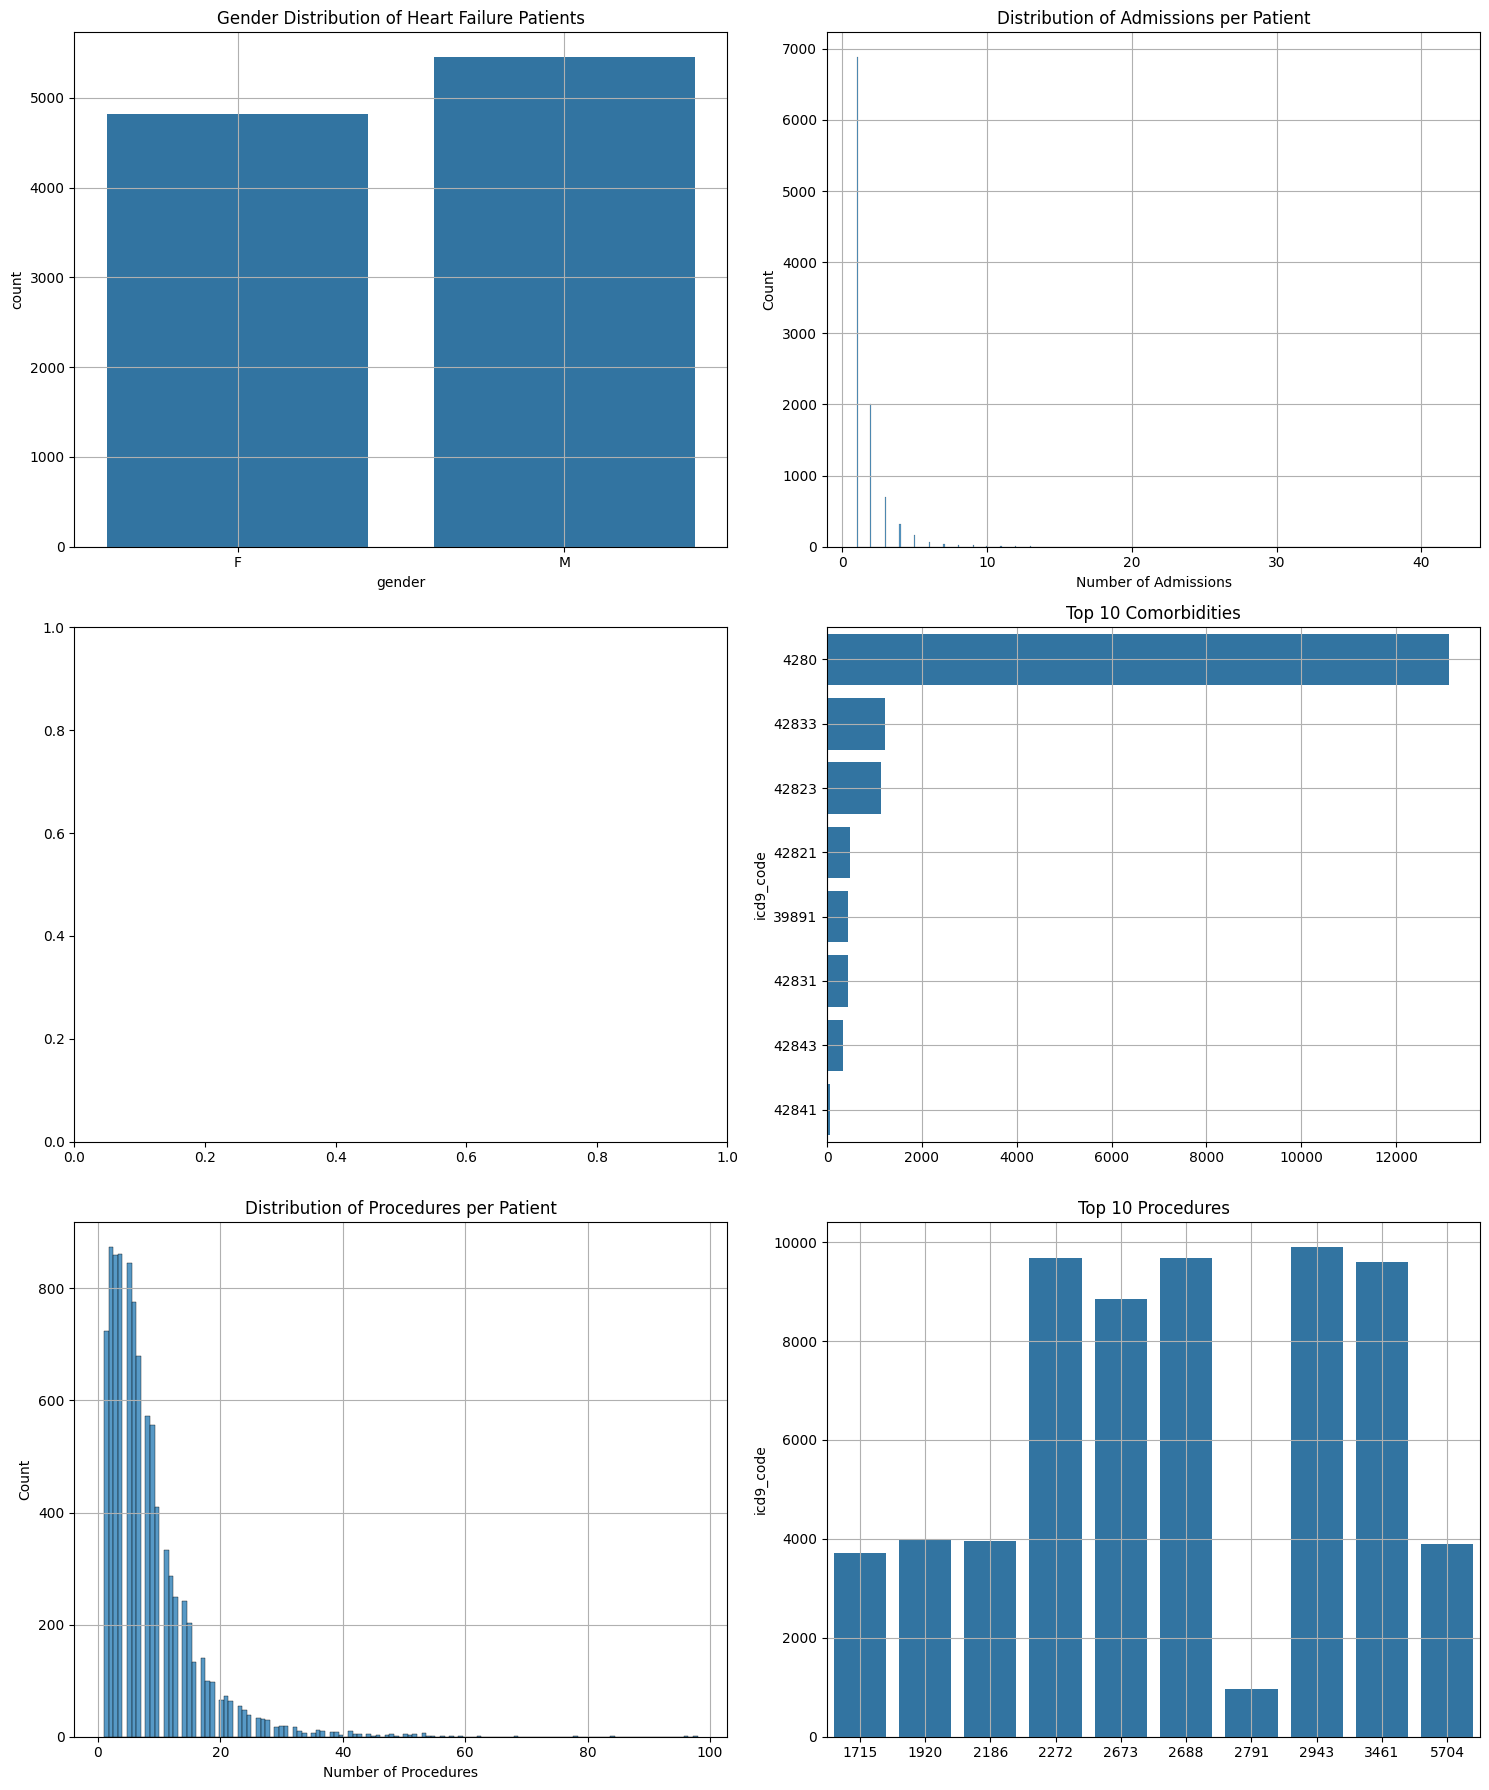

In [15]:
# Set up the plotting style - using a built-in style
plt.style.use('default')

# Determine number of subplot rows based on procedures availability
num_rows = 3 if hf_procedures is not None else 2
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 6 * num_rows))

# 1. Gender distribution (if available)
if 'gender' in hf_patients.columns:
    sns.countplot(data=hf_patients, x='gender', ax=axes[0,0])
    axes[0,0].set_title('Gender Distribution of Heart Failure Patients')
    axes[0,0].grid(True)

# 2. Admissions per patient histogram
admissions_per_patient = hf_admissions.groupby('subject_id').size()
sns.histplot(data=admissions_per_patient, ax=axes[0,1])
axes[0,1].set_title('Distribution of Admissions per Patient')
axes[0,1].set_xlabel('Number of Admissions')
axes[0,1].grid(True)

# 3. Length of stay distribution (if available)
if 'los' in hf_admissions.columns:
    sns.boxplot(y=hf_admissions['los'], ax=axes[1,0])
    axes[1,0].set_title('Length of Stay Distribution')
    axes[1,0].set_ylabel('Days')
    axes[1,0].grid(True)

# 4. Top comorbidities
top_comorbidities = hf_diagnoses['icd9_code'].value_counts().head(10)
sns.barplot(x=top_comorbidities.values, y=top_comorbidities.index, ax=axes[1,1])
axes[1,1].set_title('Top 10 Comorbidities')
axes[1,1].grid(True)

# 5 & 6. Procedures analysis (if available)
if hf_procedures is not None:
    # Procedures per patient
    procedures_per_patient = hf_procedures.groupby('subject_id').size()
    sns.histplot(data=procedures_per_patient, ax=axes[2,0])
    axes[2,0].set_title('Distribution of Procedures per Patient')
    axes[2,0].set_xlabel('Number of Procedures')
    axes[2,0].grid(True)

    # Top procedures
    top_procedures = hf_procedures['icd9_code'].value_counts().head(10)
    sns.barplot(x=top_procedures.values, y=top_procedures.index, ax=axes[2,1])
    axes[2,1].set_title('Top 10 Procedures')
    axes[2,1].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [16]:
# Add age distribution analysis
if 'age' in hf_patients.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=hf_patients, x='age', bins=30)
    plt.title('Age Distribution of Heart Failure Patients')
    plt.xlabel('Age')
    plt.grid(True)
    plt.show()

# Add procedures analysis if available
if hasattr(loader, 'procedures'):
    print("\nProcedures Analysis:")
    print("-" * 50)
    procedure_counts = loader.procedures.groupby('subject_id').size()
    print(f"Average procedures per patient: {procedure_counts.mean():.2f}")
    print(f"Max procedures for a patient: {procedure_counts.max()}")


Procedures Analysis:
--------------------------------------------------
Average procedures per patient: 5.69
Max procedures for a patient: 98
